Image-Exploratory Data Analysis and Shape determination

Plant_leaf dataset containing Images
mpimg is for loading image data
plt is for plotting 

Importing necessary lib

In [1]:
import os
#!pip install opencv-python
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()

import io


ModuleNotFoundError: No module named 'google.colab'

Reading images

In [ ]:

  
# Read Images
img1 = mpimg.imread('aa.jpeg')
img2 = mpimg.imread('bb.jpeg')
img3 = mpimg.imread('cc.jpeg')
img4 = mpimg.imread('dd.jpeg')
img5 = mpimg.imread('ee.jpeg')
 

plt.imshow(img1)


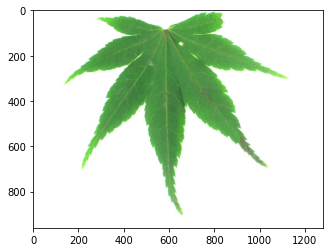

In [ ]:

plt.imshow(img1)

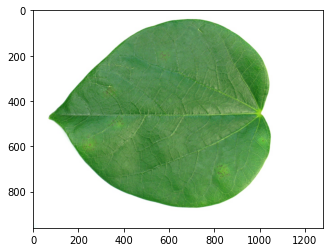

In [ ]:
plt.imshow(img2)

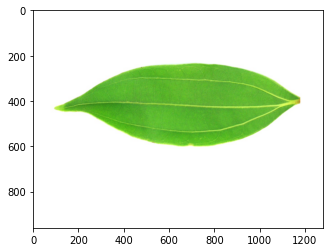

In [ ]:
plt.imshow(img3)

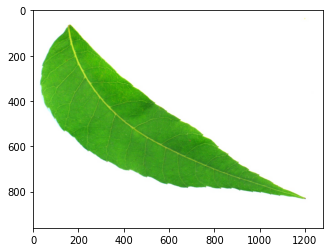

In [ ]:
plt.imshow(img4)

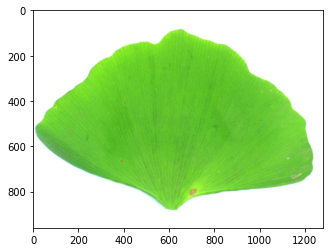

In [ ]:
plt.imshow(img5)

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(img5.dtype)
# Check the height of image 
print(img5.shape[0])
# Check the width of image 
print(img5.shape[1])
# Check the number of channels of the image
print(img5.shape[2])

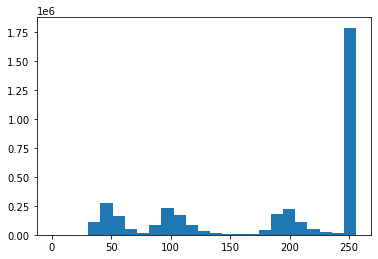

In [ ]:
plt.hist(img5.ravel(),bins = 25, range = [0,256]) 
plt.show()

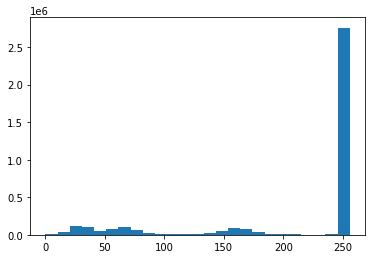

In [ ]:
plt.hist(img4.ravel(),bins = 25, range = [0,256]) 
plt.show()

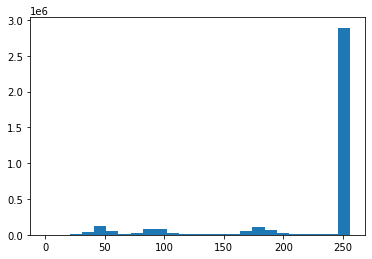

In [ ]:
plt.hist(img3.ravel(),bins = 25, range = [0,256]) 
plt.show()

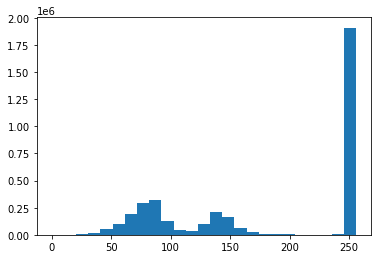

In [ ]:
plt.hist(img2.ravel(),bins = 25, range = [0,256]) 
plt.show()

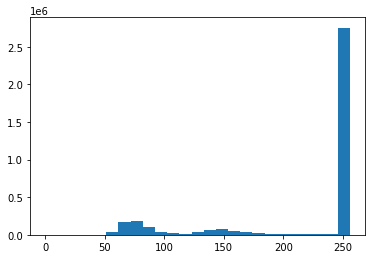

In [ ]:
plt.hist(img1.ravel(),bins = 25, range = [0,256]) 
plt.show()

Conversion to gray scale

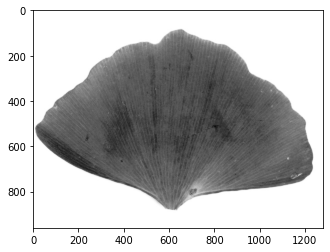

In [ ]:
gs = cv2.cvtColor(img5,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [ ]:

gs.shape

(960, 1280)

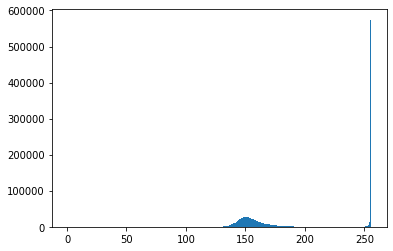

In [ ]:
# Plot the histogram of the gray image.
plt.hist(gs.ravel(),bins = 256, range = [0, 256])
plt.show()

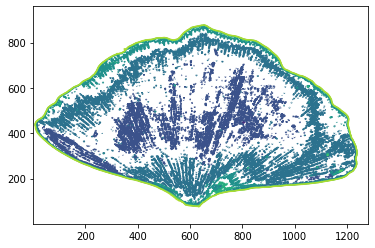

In [ ]:
# cotour detection
plt.contour(gs, origin = "upper")

Smoothing the curve using Gaussian filter

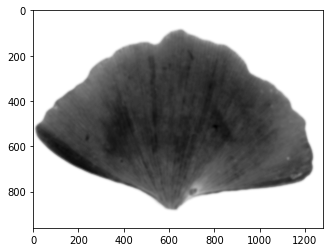

In [ ]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

Image transformation

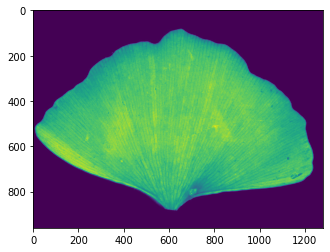

In [ ]:
im2 = 255 - gs
plt.imshow(im2)

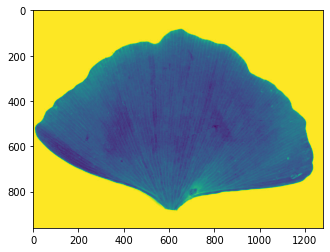

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gs + 100
plt.imshow(im3)

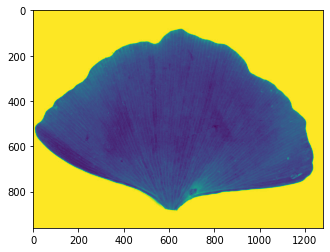

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gs/255.0)**2
plt.imshow(im4)

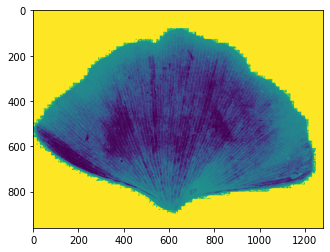

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
plt.imshow(im5)

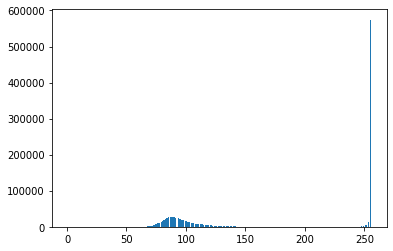

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

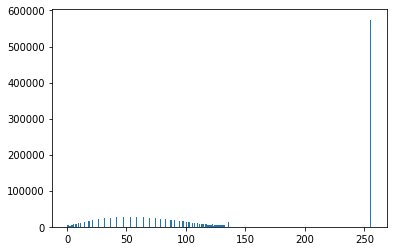

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

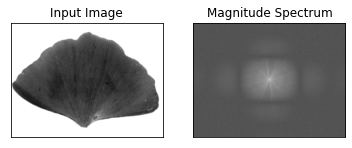

In [ ]:
# Fourier transformation of gray images
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv2.blur(gs,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

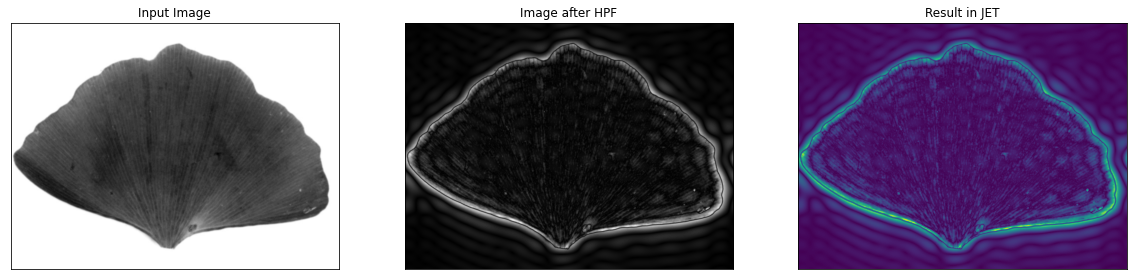

In [ ]:
# Image transformation to HPF and JET
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

#### **Gabor Filter**

In [ ]:
from google.colab import files
uploaded = files.upload()

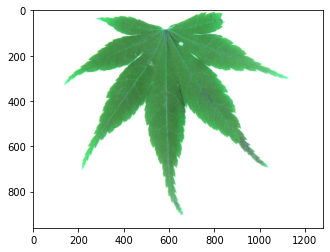

In [ ]:
img11 = cv2.imread('aa.jpeg', cv2.IMREAD_UNCHANGED)
plt.imshow(img11)
img22 = cv2.imread('aa.jpeg', cv2.IMREAD_UNCHANGED)
plt.imshow(img22)
#print(cv2_imshow(img22))

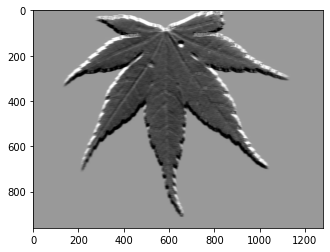

In [ ]:
ksize = 15  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 5 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi/4  #1/4 works best for angled. 
gamma=0.9  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


img = cv2.imread('aa.jpeg') #USe ksize:15, s:5, q:pi/2, l:pi/4, g:0.9, phi:0.8
plt.imshow(img, cmap='gray')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image


plt.imshow(kernel_resized)
plt.imshow(fimg, cmap='gray')


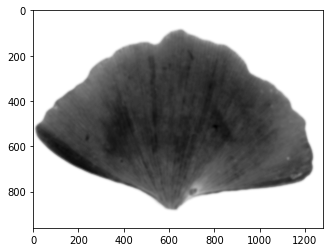

In [ ]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

Adaptive image thresholding using Otsu's thresholding method

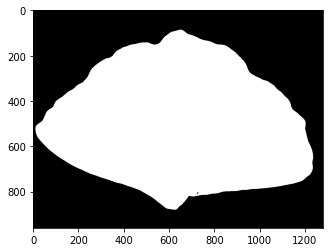

In [ ]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')


Closing of holes or dents using Morphological Transformation

In [ ]:

kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

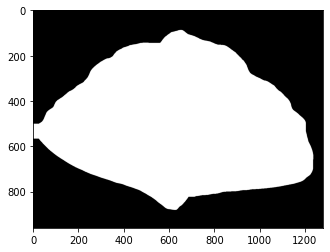

In [ ]:
plt.imshow(closing,cmap='Greys_r')

Boundary Extraction

Boundary extraction using sobel filters

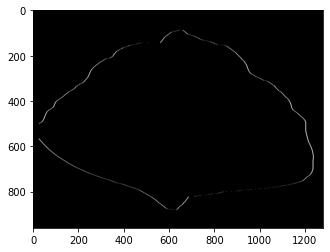

In [ ]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

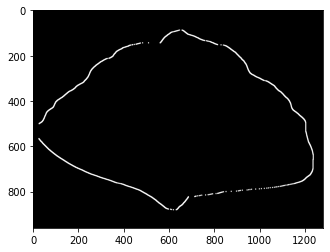

In [ ]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

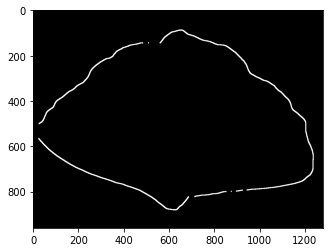

In [ ]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

Boundary extraction using sobel filters - Not effective

Boundary extraction using contours - will prove Effective¶

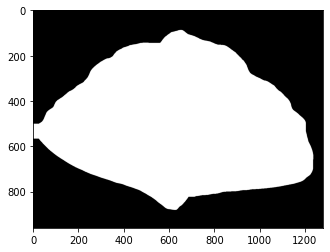

In [ ]:
plt.imshow(closing,cmap="Greys_r")

In [ ]:

contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

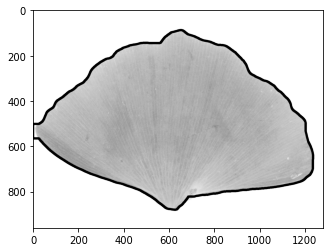

In [ ]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

Morphological processing
1. Shape based features
Calculating moments using contours


In [ ]:
print(len(contours))
cnt = contours[0]
len(cnt)

1


1361

In [ ]:
M = cv2.moments(cnt)
M

{'m00': 621658.5,
 'm01': 310284310.1666666,
 'm02': 174154459928.75,
 'm03': 105590923666993.66,
 'm10': 400938700.6666666,
 'm11': 203475345424.04166,
 'm12': 116022934176030.67,
 'm20': 310938627648.5833,
 'm21': 161142595804479.88,
 'm30': 267653237103954.5,
 'mu02': 19284297073.091827,
 'mu03': -584132397046.8281,
 'mu11': 3357454081.003174,
 'mu12': 350433074511.51953,
 'mu20': 52353179702.04208,
 'mu21': 1615067205286.7422,
 'mu30': -417031455889.8125,
 'nu02': 0.0498999442917819,
 'nu03': -0.0019170418913742062,
 'nu11': 0.00868773027968155,
 'nu12': 0.001150072975506931,
 'nu20': 0.13546880867515596,
 'nu21': 0.0053004276180749835,
 'nu30': -0.0013686396697107936}

In [ ]:
area = cv2.contourArea(cnt)
area

621658.5

In [ ]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3353.6420307159424

Fitting in the best-fit rectangle and ellipse
The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image


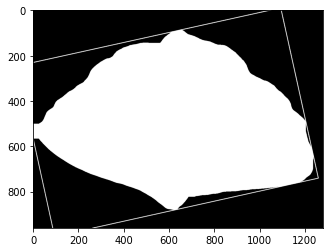

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

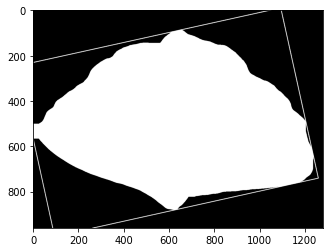

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

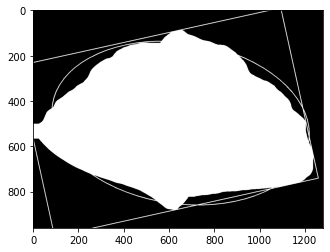

In [ ]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aa.jpeg to aa (3).jpeg


### shape detection illustration

In [ ]:
# this piece of code is for illustration purpose only

import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('aa.jpeg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

# here we are ignoring first counter because
# findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

# cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
    contour, 0.01 * cv2.arcLength(contour, True), True)

# using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

# finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])

# putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# displaying the image after drawing contours
plt.imshow(img)


In [ ]:
from google.colab.patches import cv2_imshow

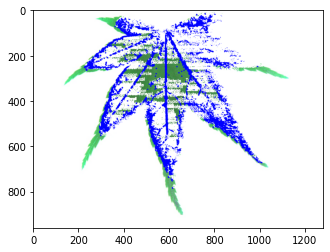

In [ ]:
# reading image
img = cv2.imread('aa.jpeg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

# here we are ignoring first counter because
# findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

# cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)

# using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])

# putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# displaying the image after drawing contours
plt.imshow(img)



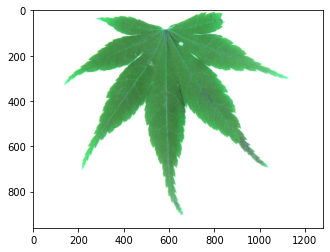

In [ ]:
img = cv2.imread('aa.jpeg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

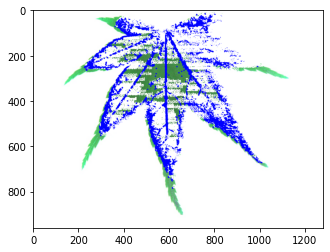

In [ ]:

# reading image
img = cv2.imread('aa.jpeg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

# here we are ignoring first counter because
# findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

# cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)

# using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])

# putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# displaying the image after drawing contours
plt.imshow(img)



Shape based features calculated - Aspect ratio, rectangularity, circularity etc

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.5618686868686869

In [ ]:
rectangularity = w*h/area
rectangularity

1.5759520701478384

In [ ]:
circularity = ((perimeter)**2)/area
circularity

18.091789736944882

In [ ]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

889.6742018968204

In [ ]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

2. Color based features

Calculating color based features - mean, std-dev of the RGB channels

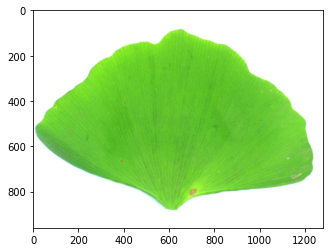

In [ ]:
plt.imshow(img5,cmap="Greys_r")

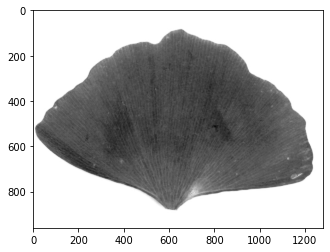

In [ ]:

red_channel = img5[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

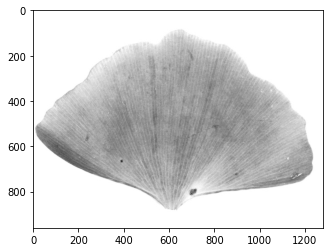

In [ ]:

green_channel = img5[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

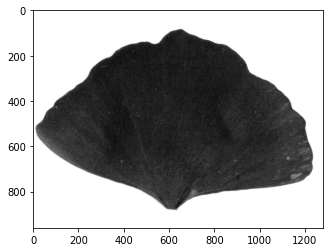

In [ ]:
blue_channel = img5[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [ ]:
red_mean = np.mean(red_channel)
red_mean

178.29074788411458

In [ ]:
green_mean = np.mean(green_channel)
green_mean

227.02734130859375

In [ ]:

blue_mean = np.mean(blue_channel)
blue_mean

150.52126220703124

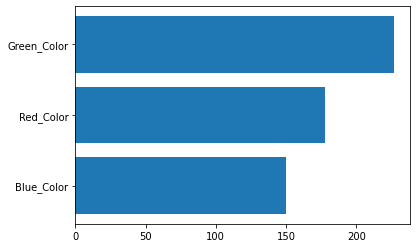

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Blue_Color", "Red_Color", "Green_Color"])
y = np.array([150,178, 227])

plt.barh(x, y)
plt.show()

3. Texture based features
calculating texture based features such as contrast, correlation, entropy

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.1MB/s 


In [ ]:
import mahotas as mt

In [ ]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 2.15226277e-01,  1.85753487e+02,  9.75053388e-01,  3.72297798e+03,
        6.77582660e-01,  3.95406847e+02,  1.47061584e+04,  4.46331653e+00,
        5.73180944e+00,  1.42317631e-03,  2.08132454e+00, -5.35679742e-01,
        9.92271305e-01])

In [ ]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

185.7534874408891
0.9750533882042004
0.6775826603028805
5.73180944176352


End of code